# PROJET **CO2**





Ce NoteBook est organisé pour rendre compte de la progression chronologique de notre travail.
Il décrit nos recherches, codes réalisé, et pistes de reflexions.


Source du jeu de données: European Environment Agency (EEA)  

https://www.eea.europa.eu/en/datahub/datahubitem-view/fa8b1229-3db6-495d-b18e-9c9b3267c02b



# 1. Mise en place de l'environnement

In [ ]:
## Montage Google Drive

from google.colab import drive
drive.mount('/content/gdrive')


In [1]:
# Import des libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# 2. Chargement du jeu de données

| ABBREV. | NOM COLONNE | REMARQUES |
| --------|------------ | --------- |
| ID | ID |
| Country | Country | S
| VFN | Vehicle family identification |
| Mp | Pool | S |
| Mh | Manufacturer name | S |
| Man | Manuf name OEM | S |
| MMS | Manuf name MS | S |
| Tan | Type approval number |  |
| T | Type |  |
| Va | Variant |  |
| Ve | Version |  |
| Mk | Make | R Attention encodage: bcp de valeurs uniques |
| Cn | Commercial name | R Attention encodage |
| Ct | Category of the vehicle |  |
| Cr | Category of the ... |  |
| r | Total new registrations | S |
| m | Mass in running order | R |
| Mt (kg) | WLTP test mass |  |
| Enedc (g/km) | Specific CO2 Emissions in g/km (NEDC) | S |
| Enedc (g/km) | Specific CO2 Emissions in g/km (WLTP) | TARGET |
| W (mm) | Base wheel in mm |  |
| At1(mm) | Axle width steering |  |
| At2 (mm) | Axle width other axle in mm |  |
| Ft | Fuel type |  |
| Fm | Fuel mode | R, à encoder |
| ec (cm3) | Engine capacity in cm3 |  |
| ep (KW) | Engine power in KW | S |
| z (Wh/km) | Electric energy consumption in Wh/km | S |
| IT | Innovative technology or group of innovative technologies |  |
| Ernedc (g/km) | Emissions reduction through innovative technologies in g/km |  S
| Erwltp (g/km) | Emissions reduction through innovative technologies in g/km (WLTP) |S
| De | Deviation factor |  |
| Vf | Verification factor |  |
| Status |  Status |
| year | registration year | S |
| Date of registration | Date of registration | S |
| Fuel consumption | Fuel consumption | S
| Electric range (km) | Electric range (km) | S

In [13]:
# se placer dans '/content/gdrive/MyDrive/ROOT/' pour avoir des chemins relatifs
# %cd "/content/gdrive/MyDrive/ROOT/"
%pwd

'd:\\0 PERSO\\00 LUDO\\Google Drive\\0 LUDO\\Projets\\Cours_info\\05 Projet Dts\\Projet_drive'

In [6]:
# Première lecture du DataSet
name = "c02_fr&al_21_v02.csv"
# path = "C:/Users/ludov/Downloads/"
path = "./Dataset/"

df = pd.read_csv(path+name, low_memory=False)
# df = pd.read_csv("./Dataset/c02_fr&al_21_v02.csv", low_memory=False)

# 34s

In [37]:
# Pour test

# Gestion d'un jeu de test réduit (save/load) et sauvegarde temporaire
# dfr = df.sample(200000)
# dfr.to_csv('./Dataset/cO2_init_reduit_200_000.csv', index = False)
dfr = pd.read_csv('./Dataset/cO2_init_reduit_200_000.csv')

df = dfr

In [38]:
# Changement des formats numériques en formats plus légers

floats = df.select_dtypes(include=['float']).columns
ints = df.select_dtypes(include=['int']).columns

df[floats] = df[floats].astype('float32')
df[ints] = df[ints].astype('float32')

In [39]:
# Utilisation des noms complets de colonne

abbrev_list = [
    'ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va', 'Ve', 'Mk',
    'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)',
    'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT',
    'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
    'Fuel consumption ', 'Electric range (km)'
]

nom_colonne_list = [
    'ID', 'Country', 'VehicleFamilyIdentification', 'Pool', 'ManufacturerName', 'ManufNameOem',
    'ManufNameMS', 'TypeApprovalNumber', 'Type', 'Variant', 'Version', 'Make', 'CommercialName',
    'VehicleCategory', 'CategoryOf', 'TotalNewRegistrations', 'MassRunningOrder',
    'WltpTestMass', 'Co2EmissionsNedc', 'Co2EmissionsWltp',
    'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther', 'FuelType', 'FuelMode',
    'EngineCapacity', 'EnginePower', 'ElectricConsumption',
    'InnovativeTechnology', 'InnovativeEmissionsReduction',
    'InnovativeEmissionsReductionWltp', 'DeviationFactor', 'VerificationFactor',
    'Status', 'RegistrationYear', 'RegistrationDate', 'FuelConsumption', 'ElectricRange'
]

name_dict = dict(zip(abbrev_list, nom_colonne_list))
df.rename(name_dict, axis=1, inplace=True)
df.head()

,ID,Country,VehicleFamilyIdentification,Pool,ManufacturerName,ManufNameOem,ManufNameMS,TypeApprovalNumber,Type,Variant,Version,Make,CommercialName,VehicleCategory,CategoryOf,TotalNewRegistrations,MassRunningOrder,WltpTestMass,Co2EmissionsNedc,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,AxleWidthOther,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReduction,InnovativeEmissionsReductionWltp,DeviationFactor,VerificationFactor,Status,RegistrationYear,RegistrationDate,FuelConsumption,ElectricRange
0,81685368.0,DE,IP-MQB37SZ_A1_1022-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e13*2007/46*1845*22,A1,DPCAX0AC4,FD7FD7CW0024BI1AANNI02GA,VOLKSWAGEN. VW,T-ROC,M1,M1,1.0,1353.0,1465.0,NaN,142.0,2590.0,1531.0,1538.0,PETROL,M,1498.0,110.0,NaN,e13 29,NaN,1.17,NaN,NaN,P,2022.0,2022-07-14,6.3,NaN
1,51090988.0,DE,IP-VN46T1Z_A1_0406-WVN-1,VW-SAIC,VOLKSWAGEN,VOLKSWAGEN AG,NaN,E1*2001/116*0220*66,7HC,GDNAA308X0,LNFD7FD7DV00116VVR24BI2B91A,"VOLKSWAGEN, VW",KOMBI,M1,M1,1.0,1994.0,2359.0,NaN,204.0,3400.0,1622.0,1628.0,DIESEL,M,1968.0,110.0,NaN,E1 29,NaN,1.00,NaN,NaN,P,2021.0,2021-09-03,7.8,NaN
2,81219280.0,DE,IP-0000709-WBA-1,BMW,BMW AG,BAYERISCHE MOTOREN WERKE AG,NaN,e1*2007/46*1797*15,G3X,51DP,IAV500N0,BMW,X3 XDRIVE 30I,M1G,M1G,1.0,1885.0,2002.0,NaN,176.0,2864.0,1620.0,1636.0,PETROL,H,1998.0,180.0,NaN,e24 32 37,NaN,2.03,NaN,NaN,P,2022.0,2022-11-23,7.7,NaN
3,81945008.0,DE,IP-MQB37WZ_A1_0573-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*2014*15,CD,ACDPBAX0,FM6FM6AJ026N4BISON1VL1BVR2AIM,VOLKSWAGEN. VW,GOLF,M1,M1,1.0,1306.0,1400.0,NaN,124.0,2619.0,1503.0,1533.0,PETROL,M,1498.0,96.0,NaN,e1 29 37,NaN,1.97,NaN,NaN,P,2022.0,2022-02-01,5.5,NaN
4,80113504.0,DE,IP-MQB37SZ_A0_1035-TMB-1,VOLKSWAGEN,SKODA,SKODA AUTO AS,NaN,e8*2007/46*0272*24,NU,ACDXDBX0,NFD7FD7CW0064BI16N0C1A1A,SKODA,KAROQ,M1,M1,1.0,1417.0,1516.0,NaN,139.0,2625.0,1537.0,1572.0,PETROL,M,1498.0,110.0,NaN,e8 29 37,NaN,2.00,NaN,NaN,P,2022.0,2022-11-17,6.2,NaN


# 3. Premieres remarques exploratoires

DeltaGenerator()

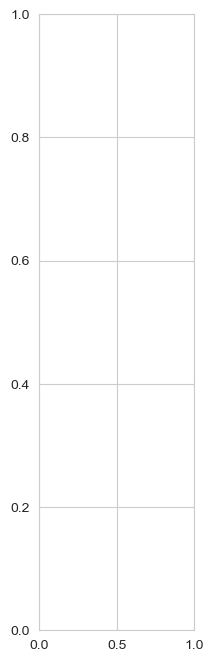

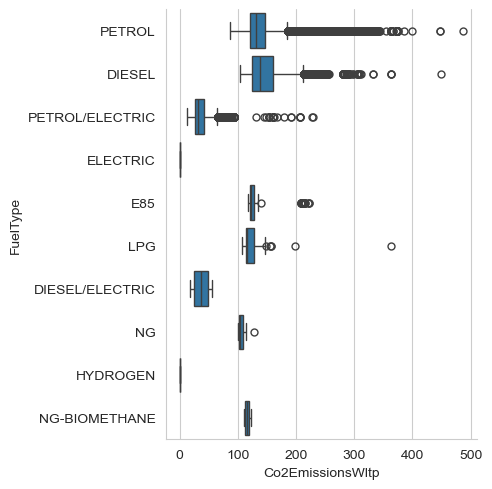

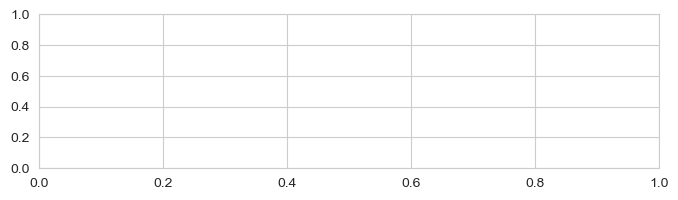

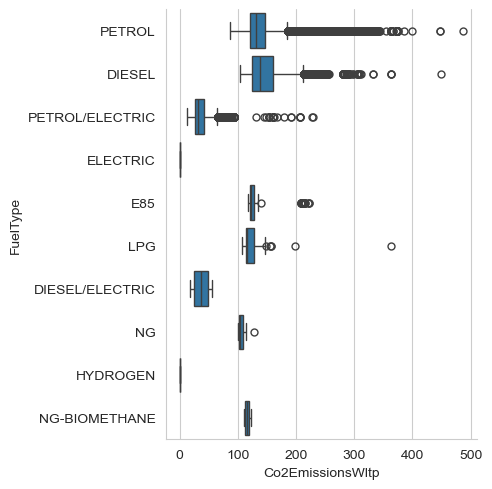

In [44]:
from PIL import Image
import streamlit as st

fig,ax = plt.subplots(figsize=(2,8))
ax = sns.catplot(x='Co2EmissionsWltp', y='FuelType', data=df, kind='box')
fig.savefig("figure_name.png")
image = Image.open('figure_name.png')
st.image(image)

fig,ax = plt.subplots(figsize=(8,2))
fig = sns.catplot(x='Co2EmissionsWltp', y='FuelType', data=df, kind='box')
fig.savefig("figure_name.png")
image = Image.open('figure_name.png')
st.image(image)


In [ ]:
# Informations générales
df.info()

In [ ]:
# Inspection des NaN
print("[PROPORTIONS de NaN]")
display(df.isna().mean().sort_values(ascending=False)*100)


In [ ]:
# Inspection des duplicata
df.duplicated().sum()

518197

# 4. Etude sur les Variables

## 4.1. Outils communs

In [77]:
correlation = df['Co2EmissionsWltp'].corr(df['EnginePower'])
correlation

0.8544112643396309

In [ ]:
df.Pool.value_counts(normalize=True)*100
df[['ManufacturerName', 'Make']].head(50)


## 4.2 Première suppression de colonnes inutiles

1. Recherche de colonnes trop liées -> On supprime la colonne   

2. Recherche de carac non corrélées avec CO2  -> On supprime la colonne ?   


In [6]:
# Suppression des colonnes: Prop de NaN est trop importante et/ou peu d'interet pour prédire la cible.

to_drop = ['ID', 'Country', 'VehicleFamilyIdentification', 'ManufacturerName', 'ManufNameOem', 'ManufNameMS',
           'TypeApprovalNumber', 'Type', 'Variant', 'Version', 'Make', 'CommercialName', 'VehicleCategory',
           'TotalNewRegistrations', 'Co2EmissionsNedc',
           'DeviationFactor', 'VerificationFactor', 'Status',
           'RegistrationYear', 'RegistrationDate']

df.drop(to_drop, axis=1, inplace=True)

In [ ]:
print(df.columns)

In [83]:
# Temp
# dfc = df.copy()
# dfr = df.copy()
df = dfc

In [ ]:
# Matrice de corrélation des variables qualitatives + tableaux de graphiques.

## 4.3. Consommation de carburant

Etude de la correlation lineaire avec la cible

In [92]:
df = df[df['FuelType'].isin(['PETROL'])]   

In [94]:
df = df[['Co2EmissionsWltp','FuelConsumption','EngineCapacity','EnginePower']]
df = df.dropna(how = 'any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3974497 entries, 196 to 8517877
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Co2EmissionsWltp  float32
 1   FuelConsumption   float32
 2   EngineCapacity    float32
 3   EnginePower       float32
dtypes: float32(4)
memory usage: 91.0 MB


In [95]:
# Corrélation avec'Co2EmissionsWltp'
correlation = df['Co2EmissionsWltp'].corr(df['FuelConsumption'])
correlation

# 'FuelConsumption' : 0.995

0.9994995595081625

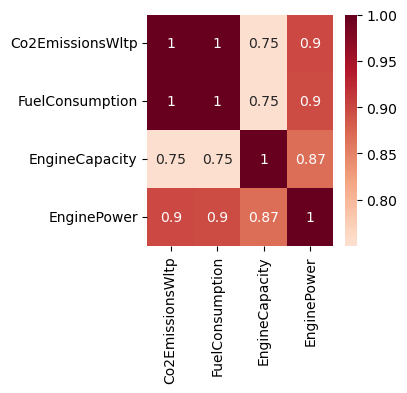

In [96]:
# Matrice de corrélation
plt.figure(figsize = (3,3))
sns.heatmap(df.corr(), annot = True,  cmap='RdBu_r', center = 0.7)
plt.show()

<Figure size 200x200 with 0 Axes>

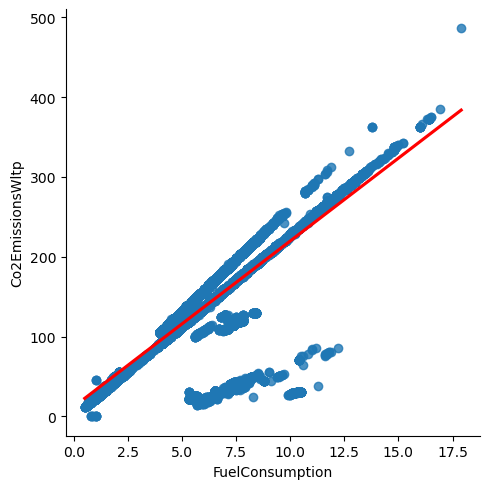

ValueError: array must not contain infs or NaNs

In [7]:
### Recherche graphique de corrélation. 
from scipy.stats import pearsonr

plt.figure(figsize = (2,2))
sns.lmplot(x = 'FuelConsumption', y = 'Co2EmissionsWltp', data = df, line_kws = {'color': 'red'})
plt.show()

pears = pearsonr(x = df['FuelConsumption'], y = df['Co2EmissionsWltp'])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])

In [9]:
# Un modele de regression lineaire simple
from sklearn.linear_model import LinearRegression
X = df[['FuelConsumption']]
y = df['Co2EmissionsWltp']

model =  LinearRegression()
model.fit(X,y)
slope = model.coef_[0]
intercept = model.intercept_

print("y = ",slope,"x +", intercept)

# 19.711414 21.931938
# Refaire avec france seule

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
# SCORING
# Calculons MAE, MAPE, Moyenne, R2

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

X_train = X
y_train = y
pred_train = model.predict(X_train)

print('score R2 train :',r2_score(y_train, pred_train))
print("MSE train:", mean_squared_error(y_train, pred_train))
print("MAE train:", mean_absolute_error(y_train, pred_train))

mape = np.mean(np.abs((y_train - pred_train) / y_train)) * 100
print("MAPE train:", mape)


X_name = 'FuelConsumption'
reel_name = 'Co2EmissionsWltp'

res = df[[X_name, reel_name]]
res['predict'] = pred_train
res['residu']= pred_train - y_train

print(res.sample(10).sort_values(by=X_name) )

# Faire un graphe ? 
# Automatiser ?

NameError: name 'X' is not defined

In [10]:
# Comparaison avec la 2nde correlation la plus forte. 

from sklearn.linear_model import LinearRegression
X = df[['EnginePower']]
y = df['Co2EmissionsWltp']

model =  LinearRegression()
model.fit(X,y)
slope = model.coef_[0]
intercept = model.intercept_
print("y = ",slope,"x +", intercept)

# SCORING
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

X_train = X
y_train = y
pred_train = model.predict(X_train)


print('score R2 train :',r2_score(y_train, pred_train))
print("MSE train:", mean_squared_error(y_train, pred_train))
print("MAE train:", mean_absolute_error(y_train, pred_train))

mape = np.mean(np.abs((y_train - pred_train) / y_train)) * 100
print("MAPE train:", mape)

X_name = 'EnginePower'
reel_name = 'Co2EmissionsWltp'

res = df[[X_name, reel_name]]
res['predict'] = pred_train
res['residu']= pred_train - y_train

print(res.sample(10).sort_values(by=X_name) )

# y =  0.4734445 x + 89.01094


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 4.4 Corrélations moteur

In [120]:
df.columns

Index(['Pool', 'CategoryOf', 'MassRunningOrder', 'WltpTestMass',
       'Co2EmissionsWltp', 'BaseWheel', 'AxleWidthSteering', 'AxleWidthOther',
       'FuelType', 'FuelMode', 'EngineCapacity', 'EnginePower',
       'ElectricConsumption', 'InnovativeTechnology',
       'InnovativeEmissionsReduction', 'InnovativeEmissionsReductionWltp',
       'FuelConsumption', 'ElectricRange'],
      dtype='object')

In [10]:
x_name = 'EngineCapacity'
y_name = 'EnginePower'

df = df[[x_name, y_name]]
df = df.dropna(how = 'any')
# df.info()

# Corrélation 
correlation = df[x_name].corr(df[y_name])
correlation

# # Matrice de corrélation
# plt.figure(figsize = (3,3))
# sns.heatmap(df.corr(), annot = True,  cmap='RdBu_r', center = 0.7)
# plt.show()

# 'FuelConsumption' : 0.995

0.823521873649522

In [24]:
def correlations(x_name, y_name, df=df):
    df = df[[x_name, y_name]]
    df = df.dropna(how = 'any')
    # Corrélation 
    correlation = df[x_name].corr(df[y_name])

    fig = plt.figure(figsize = (2,2))
    sns.lmplot(x = x_name, y = y_name, data = df, line_kws = {'color': 'red'})
    # plt.show())
    return fig

# pears = pearsonr(x = df[x_name], y = df[y_name])
# print("p-value: ", pears[1])
# print("coefficient: ", pears[0])



<Figure size 200x200 with 0 Axes>

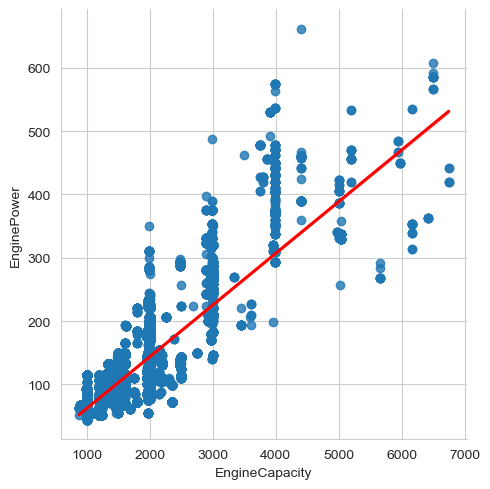

In [25]:
x_name = 'EngineCapacity'
y_name = 'EnginePower'

img1 = correlations(x_name, y_name, df=df)



ValueError: Could not interpret value `Co2` for `x`. An entry with this name does not appear in `data`.

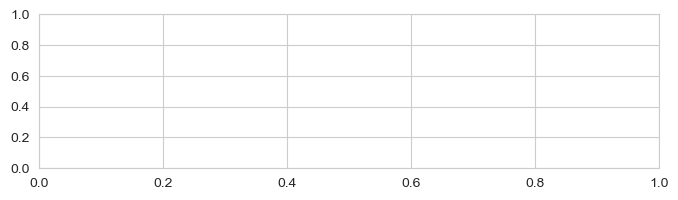

In [26]:
fig,ax = plt.subplots(figsize=(8,2))
fig = sns.catplot(x='Co2', y='FuelType', data=df, kind='box')
fig.savefig("figure_name.png")

In [22]:
def correl_graph(x_name, y_name, df=df):
    dft = df[[x_name, y_name]]
    dft = dft.dropna(how = 'any')
    # # Corrélation 
    # # correl = dft[x_name].corr(dft[y_name])
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(5,5))
    sns.lmplot(x = x_name, y = y_name, data = dft)        
    return fig
    


<Figure size 500x500 with 0 Axes>

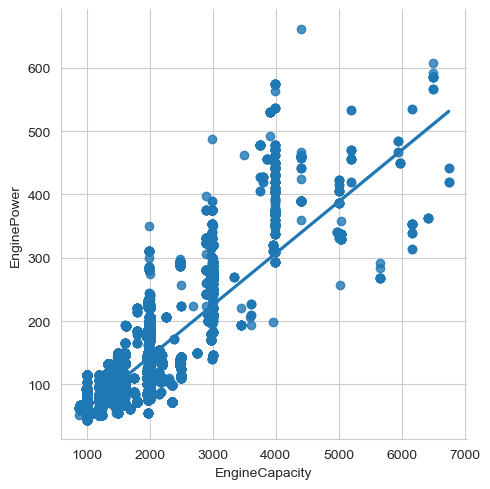

In [23]:
x_name = 'EngineCapacity'
y_name = 'EnginePower'


fig = correl_graph(x_name, y_name, df=df)
plt.show()
# st.write(dft2)


# st.write(fig)

In [17]:
img1.show()

C:\Users\ludov\AppData\Local\Temp\ipykernel_35224\3228036520.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  img1.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84069 entries, 0 to 97919
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EngineCapacity  84069 non-null  float32
 1   EnginePower     84069 non-null  float32
dtypes: float32(2)
memory usage: 1.3 MB


<Figure size 200x200 with 0 Axes>

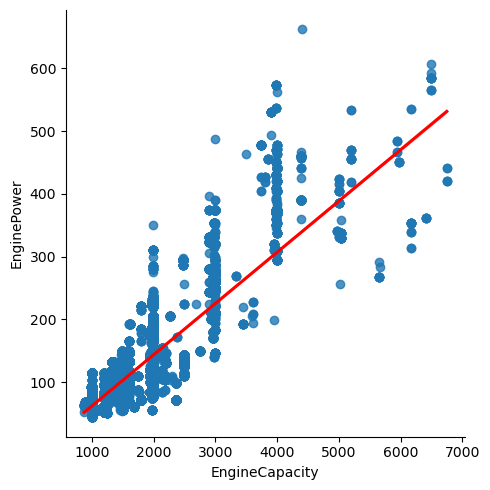

p-value:  0.0
coefficient:  0.8235218736495227


In [11]:
### Recherche graphique de corrélation. 
from scipy.stats import pearsonr

plt.figure(figsize = (2,2))
sns.lmplot(x = x_name, y = y_name, data = df, line_kws = {'color': 'red'})
plt.show()

pears = pearsonr(x = df[x_name], y = df[y_name])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])

# 5.2. Etude sur les marques présentes

In [51]:
# checking for unique variables
print(len(df['Pool'].unique()))

14


In [57]:
c = df['Pool'].value_counts(normalize = True).round(3)*100
c

Pool
STELLANTIS                    20.9
RENAULT-NISSAN-MITSUBISHI     15.8
VW-SAIC                       14.4
VOLKSWAGEN                    14.1
BMW                            8.0
MERCEDES-BENZ                  7.2
MAZDA-SUBARU-SUZUKI-TOYOTA     5.9
FORD                           4.1
KIA                            2.9
HYUNDAI MOTOR EUROPE           1.9
HYUNDAI                        1.9
TESLA-HONDA-JLR                1.6
TESLA                          1.3
Name: proportion, dtype: float64

## 5.2. Etude de la colonne "FuelType"

In [ ]:
# Traitement de la colonne FuelType

# On regroupe et renomme pertinemment les types de carcurants: 'PETROL', 'DIESEL', 'NATURALGAS', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'HYDROGEN', 'ELECTRIC'
# Petrol/electric ou 'DIESEL/ELECTRIC' sont des voiture Hybrides

df.loc[df['FuelType'] == 'petrol/electric', 'FuelType'] = 'PETROL/ELECTRIC'
df.loc[df['FuelType'] == 'E85', 'FuelType'] = 'ETHANOL'
df.loc[df['FuelType'] == 'NG-BIOMETHANE', 'FuelType'] = 'NATURALGAS'

# Suppression des lignes FuelType = Unknow  (peu de valeurs)
print(df['FuelType'].value_counts())

PETROL             4317963
DIESEL             1868840
ELECTRIC           1205156
PETROL/ELECTRIC     904203
LPG                 118374
DIESEL/ELECTRIC      53983
ETHANOL              41918
NG                    6331
HYDROGEN              1081
NATURALGAS              29
UNKNOWN                  5
Name: FuelType, dtype: int64
CPU times: user 3.65 s, sys: 16.7 ms, total: 3.67 s
Wall time: 3.69 s


## 5.3. Etude des Masses: MassRunningOrder" - "WltpTestMass"

In [111]:
x_name = 'MassRunningOrder'
y_name = 'WltpTestMass'

df = df[[x_name, y_name]]
df = df.dropna(how = 'any')
df.info()

# Corrélation 
correlation = df[x_name].corr(df[y_name])
correlation

# # Matrice de corrélation
# plt.figure(figsize = (3,3))
# sns.heatmap(df.corr(), annot = True,  cmap='RdBu_r', center = 0.7)
# plt.show()

# 'FuelConsumption' : 0.995


<class 'pandas.core.frame.DataFrame'>
Index: 8481404 entries, 0 to 8517882
Data columns (total 2 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MassRunningOrder  float32
 1   WltpTestMass      float32
dtypes: float32(2)
memory usage: 129.4 MB


0.9932026423703963

<Figure size 200x200 with 0 Axes>

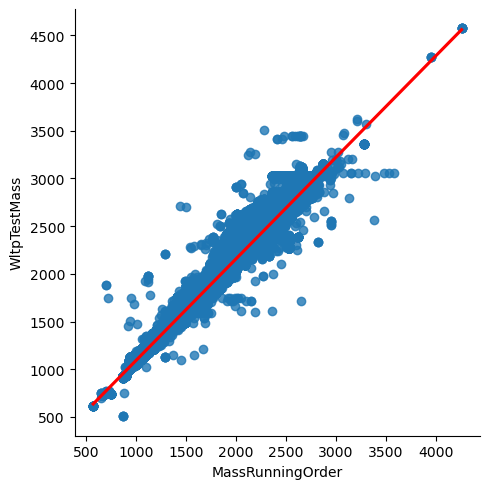

ValueError: array must not contain infs or NaNs

In [110]:
### Recherche graphique de corrélation. 
from scipy.stats import pearsonr

plt.figure(figsize = (2,2))
sns.lmplot(x = x_name, y = y_name, data = df, line_kws = {'color': 'red'})
plt.show()

pears = pearsonr(x = df[x_name], y = df[y_name])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])

In [108]:
# Comparaison avec la 2nde correlation la plus forte. 

from sklearn.linear_model import LinearRegression
x_name = 'MassRunningOrder'
y_name = 'WltpTestMass'

X = df[[x_name]]
y = df[y_name]

# Matrice de corrélation
plt.figure(figsize = (3,3))
sns.heatmap(df.corr(), annot = True,  cmap='RdBu_r', center = 0.7)
plt.show()













model =  LinearRegression()
model.fit(X,y)
slope = model.coef_[0]
intercept = model.intercept_
print("y = ",slope,"x +", intercept)

# SCORING
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

X_train = X
y_train = y
pred_train = model.predict(X_train)


print('score R2 train :',r2_score(y_train, pred_train))
print("MSE train:", mean_squared_error(y_train, pred_train))
print("MAE train:", mean_absolute_error(y_train, pred_train))

mape = np.mean(np.abs((y_train - pred_train) / y_train)) * 100
print("MAPE train:", mape)

X_name = 'EnginePower'
reel_name = 'Co2EmissionsWltp'

res = df[[X_name, reel_name]]
res['predict'] = pred_train
res['residu']= pred_train - y_train

print(res.sample(10).sort_values(by=X_name) )

# y =  0.4734445 x + 89.01094

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

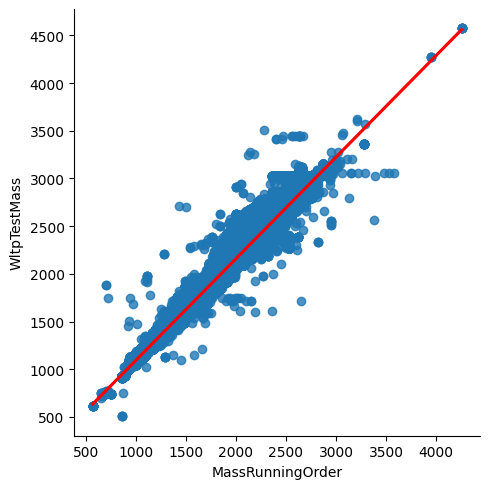

                  MassRunningOrder  WltpTestMass
MassRunningOrder          1.000000      0.993203
WltpTestMass              0.993203      1.000000 

p-value:  0.0
coefficient:  0.9932026423702751


In [ ]:
### Recherche graphique de corrélation : "MassRunningOrder"/ "WltpTestMass"

%%time
from scipy.stats import pearsonr

df.dropna(subset=['MassRunningOrder', 'WltpTestMass'],how = 'any', inplace = True)

sns.lmplot(x = "MassRunningOrder", y = "WltpTestMass", data = df, line_kws = {'color': 'red'})
plt.show()

corr_matrix = df[["MassRunningOrder", "WltpTestMass"]].corr()
print(corr_matrix, "\n")

pears = pearsonr(x = df["MassRunningOrder"], y = df["WltpTestMass"])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])b

# Conclusion : On garde que WltpTestMass, et/ou on sort la valeur anormale

CPU times: user 371 ms, sys: 213 ms, total: 583 ms
Wall time: 589 ms


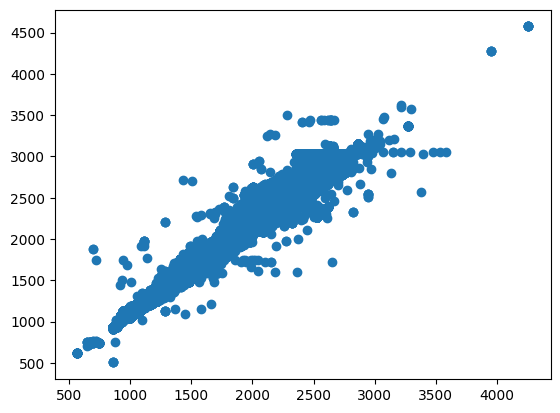

In [ ]:
# Variante Scatterplot

%%time
# display(df.MassRunningOrder, df.WltpTestMass)
plt.scatter(df.MassRunningOrder, df.WltpTestMass)

In [ ]:
# Conclusion : On garde que WltpTestMass, et/ou on sort la valeur anormale


## 5.4.Signification de "VehicleCategory" = M1G  
2 modalites pour cette variable. M1 ou M1G. Quelle signification ?

In [ ]:
### liste des "VehicleCategory" = M1G

df.loc[df.VehicleCategory == "M1G"].drop_duplicates(subset=['CommercialName']).head(15)

# Conlusion: Les M1G sont une sous classe de M1: Véhicules tout terrain.
# A voir, quels sont les véhicules non inclus dans l'étude. (limites de l'étude)

,ID,Country,VehicleFamilyIdentification,Pool,ManufacturerName,ManufNameOem,ManufNameMS,TypeApprovalNumber,Type,Variant,Version,Make,CommercialName,VehicleCategory,CategoryOf,TotalNewRegistrations,MassRunningOrder,WltpTestMass,Co2EmissionsNedc,Co2EmissionsWltp,BaseWheel,AxleWidthSteering,AxleWidthOther,FuelType,FuelMode,EngineCapacity,EnginePower,ElectricConsumption,InnovativeTechnology,InnovativeEmissionsReduction,InnovativeEmissionsReductionWltp,DeviationFactor,VerificationFactor,Status,RegistrationYear,RegistrationDate,FuelConsumption,ElectricRange
6753,50368940.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,DURANGO,RT,NaN,DODGE,DODGE DURANGO,M1G,M1G,1.0,2677.0,NaN,NaN,370.0,NaN,NaN,NaN,PETROL,M,5654.0,268.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-05-12,NaN,NaN
17864,50380048.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,DURANGO,R/T,AWD,DODGE,DODGE DURANGO R/T,M1G,M1G,1.0,2599.0,NaN,NaN,NaN,NaN,NaN,NaN,LPG,B,5654.0,268.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-08-23,NaN,NaN
20419,50382604.0,DE,IP-0000712-WBA-1,NaN,AA-IVA,AA-IVA,NaN,E1*2007/46*1797*12,G3X,61DP,IAW50000,BMW,X3 XDRIVE 30E,M1G,M1G,1.0,2065.0,2216.0,NaN,47.0,2864.0,1620.0,1636.0,PETROL/ELECTRIC,P,1998.0,135.0,191.0,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-11-09,8.0,NaN
28972,50391160.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,WRANGLER,RUBICON,RUBICON,JEEP,WRANGLER RUBICON,M1G,M1G,1.0,2133.0,NaN,NaN,296.0,NaN,NaN,NaN,PETROL,M,3604.0,209.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-12-13,NaN,NaN
40056,50502248.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,WRANGLER,RUBICON,RUBICON,JEEP,JEEP WRANGLER,M1G,M1G,1.0,1915.0,NaN,NaN,273.0,NaN,NaN,NaN,PETROL,M,3604.0,209.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-11-16,NaN,NaN
73030,50535228.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,E1*96/79*0064*38,463,C77EP1,NZAA0514,MERCEDES-BENZ,G 500,M1G,M1G,1.0,2595.0,NaN,NaN,NaN,2850.0,1501.0,1501.0,PETROL,M,3982.0,310.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-07-07,NaN,NaN
73362,50535560.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,H1GLE,NaN,NaN,MERCEDES-BENZ,AMG GLE 53 4MATIC,M1G,M1G,1.0,2305.0,NaN,NaN,NaN,NaN,NaN,NaN,PETROL,H,2999.0,320.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-09-22,NaN,NaN
73475,50535672.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,H1GLE,NaN,NaN,MERCEDES-BENZ,GLE 400 D 4MATIC COUPE,M1G,M1G,1.0,2310.0,NaN,NaN,234.0,NaN,NaN,NaN,DIESEL,M,2925.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-12-10,NaN,NaN
73586,50535784.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,H1GLE,NaN,NaN,MERCEDES-BENZ,AMG GLS 63 S,M1G,M1G,1.0,2630.0,NaN,NaN,NaN,NaN,NaN,NaN,PETROL,H,3982.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-07-05,NaN,NaN
74919,50537120.0,DE,NaN,NaN,AA-IVA,AA-IVA,NaN,NaN,204X,NaN,NaN,MERCEDES-BENZ,EQC 400 4MATIC,M1G,M1G,1.0,2495.0,NaN,0.0,0.0,NaN,NaN,NaN,ELECTRIC,E,NaN,145.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2021.0,2021-09-13,NaN,NaN


## 5.5. Etudes des variables 'FuelMode' et 'FuelType'

In [ ]:
# Exploration de la variable 'Fm' (Fuel Mode)
import matplotlib.pyplot as plt

display(pd.crosstab(df.FuelType, df.FuelMode, normalize = False))
print(round(pd.crosstab(df.FuelType, df.FuelMode, normalize = 0)*100),0)
print(round(pd.crosstab(df.FuelType, df.FuelMode, normalize = 1)*100),0)

# Conclusion: Fuel mode peu compréhensible, meme mis en relation avec le type d'energie

FuelMode,B,E,F,H,M,P
FuelType,,,,,,
DIESEL,0,0,0,359518,1509322,0
DIESEL/ELECTRIC,0,0,0,0,0,53983
ELECTRIC,0,1205156,0,0,0,0
ETHANOL,0,0,14652,27266,0,0
HYDROGEN,0,0,0,0,1081,0
LPG,118374,0,0,0,0,0
NATURALGAS,29,0,0,0,0,0
NG,0,0,0,0,6331,0
PETROL,0,0,0,1160273,3157690,0


FuelMode             B      E     F     H      M      P
FuelType                                               
DIESEL             0.0    0.0   0.0  19.0   81.0    0.0
DIESEL/ELECTRIC    0.0    0.0   0.0   0.0    0.0  100.0
ELECTRIC           0.0  100.0   0.0   0.0    0.0    0.0
ETHANOL            0.0    0.0  35.0  65.0    0.0    0.0
HYDROGEN           0.0    0.0   0.0   0.0  100.0    0.0
LPG              100.0    0.0   0.0   0.0    0.0    0.0
NATURALGAS       100.0    0.0   0.0   0.0    0.0    0.0
NG                 0.0    0.0   0.0   0.0  100.0    0.0
PETROL             0.0    0.0   0.0  27.0   73.0    0.0
PETROL/ELECTRIC    0.0    0.0   0.0   0.0    0.0  100.0
UNKNOWN            0.0    0.0   0.0   0.0   50.0   50.0 0
FuelMode             B      E      F     H     M     P
FuelType                                              
DIESEL             0.0    0.0    0.0  23.0  32.0   0.0
DIESEL/ELECTRIC    0.0    0.0    0.0   0.0   0.0   6.0
ELECTRIC           0.0  100.0    0.0   0.0   0.0  

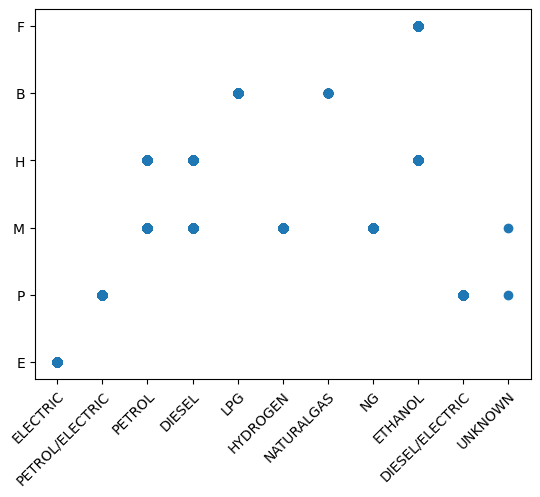

In [ ]:
# Exploration de la variable 'FuelMode' - Graphique

# On enleve temporairement les NaN pour faire le graphe
df1 = df.dropna(subset = ['FuelType', 'FuelMode'], how = 'any')

# Graphique
fig, ax = plt.subplots()
plt.scatter(df1.FuelType, df1.FuelMode)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()


## 5.6. Etudes des variables 'BaseWheel', 'AxleWidthSteering'
 (longueur/largeur)

**Conclusions:**  

- Co2       non correl avec  BaseWheel, Axle, Engine capacity   -> Supr BaseWheel, Axle, en première intention ?
- Co2       correl++ with    FuelConsumption  

- BaseWhell correl with      Axle                               -> Supr 1 des deux (Base car moins corrélé)
- Mass      correl with      Axle, BaseWhell, EngineCapacity    -> Supr BaseWheel, Axle, en première intention ? (Et on garde Mass)
    
- MassRunningOrder     corre++ with     "WltpTestMass"           -> Supr 1 des deux (Voir ci dessous)

In [ ]:
from scipy.stats import pearsonr

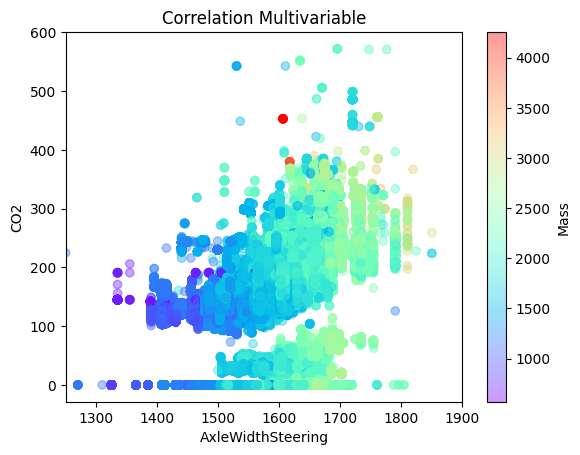

                   AxleWidthSteering  MassRunningOrder
AxleWidthSteering           1.000000          0.807589
MassRunningOrder            0.807589          1.000000 

p-value:  0.0
coefficient:  0.8075892577189838
CPU times: user 3min 43s, sys: 12.6 s, total: 3min 55s
Wall time: 4min 2s


In [ ]:
### Recherche graphique de corrélation sur 3 varaibles Mass, Co2, AxleWidthSteering

%%time

# On enleve temporairement les NaN pour faire le graphe
df1 = df.dropna(subset = ['MassRunningOrder', 'Co2EmissionsWltp', 'AxleWidthSteering'], how = 'any')

# plt.figure(figsize=(15,10))
plt.scatter(df1.AxleWidthSteering, df1.Co2EmissionsWltp, c=df1['MassRunningOrder'],cmap= 'rainbow',
            label=("Co2"), alpha=0.4)

plt.colorbar(label="Mass")
plt.xlim([1250,1900]);
plt.title("Correlation Multivariable")
plt.ylabel("CO2")
plt.xlabel("AxleWidthSteering")
plt.show()


### Coef de corrélation de pearson
from scipy.stats import pearsonr

corr_matrix = df1[["AxleWidthSteering", "MassRunningOrder"]].corr()
print(corr_matrix, "\n")

pears = pearsonr(x = df1["AxleWidthSteering"], y = df1["MassRunningOrder"])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])

# Faire un tableau avec touts les coefs de correlations parlant pour justifier tout en une fois



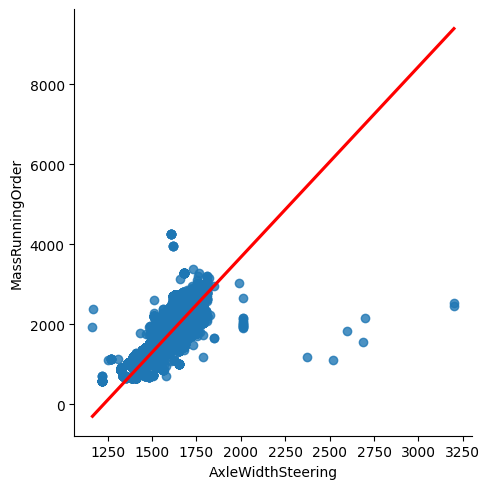

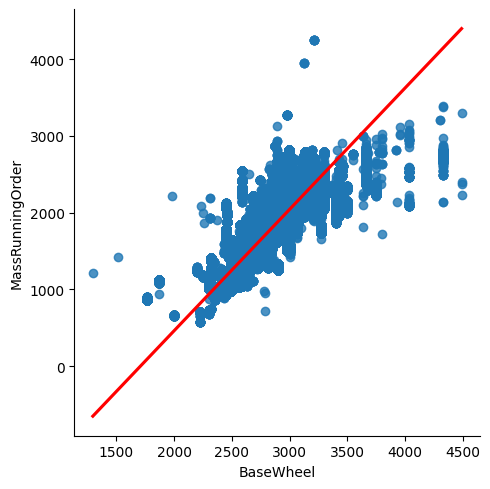

In [ ]:
### Correlation entre longueur/largeur et Masses ('BaseWheel, AxleWidthSteering)

import statsmodels

sns.lmplot(x = "AxleWidthSteering", y = "MassRunningOrder", data = df, line_kws = {'color': 'red'})  #Erreur avec lowess = True
plt.show()

sns.lmplot(x = "BaseWheel", y = "MassRunningOrder", data = df, line_kws = {'color': 'red'})  #Erreur avec lowess = True
plt.show()

# On note quelques valeurs extremes: A surveiller.

In [ ]:
### Correlation entre "AxleWidthSteering" et "CO2"
%%time

# On enleve temporairement les NaN pour faire le graphe
df1 = df.dropna(subset = ["AxleWidthSteering", 'Co2EmissionsWltp'], how = 'any')

corr_matrix = df1[["AxleWidthSteering", "Co2EmissionsWltp"]].corr()
print(corr_matrix, "\n")

pears = pearsonr(x = df1["AxleWidthSteering"], y = df1["Co2EmissionsWltp"])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])

                   AxleWidthSteering  Co2EmissionsWltp
AxleWidthSteering           1.000000          0.157101
Co2EmissionsWltp            0.157101          1.000000 

p-value:  0.0
coefficient:  0.15710095743701868
CPU times: user 1.19 s, sys: 1.04 s, total: 2.23 s
Wall time: 2.14 s


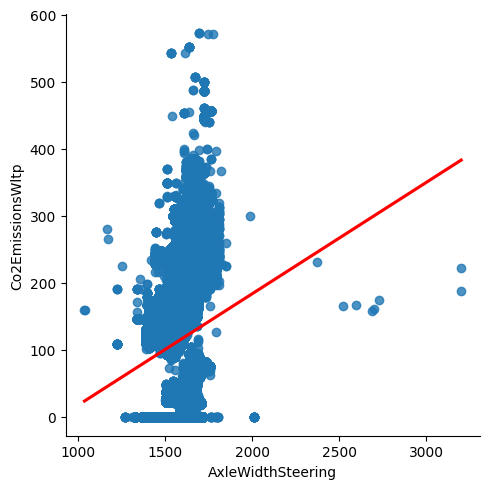

In [ ]:
# On enleve temporairement les NaN pour faire le graphe
df1 = df.dropna(subset = ["AxleWidthSteering", 'Co2EmissionsWltp'], how = 'any')

sns.lmplot(x = "AxleWidthSteering", y = "Co2EmissionsWltp", data = df, line_kws = {'color': 'red'})  #Erreur avec lowess = True
plt.show()


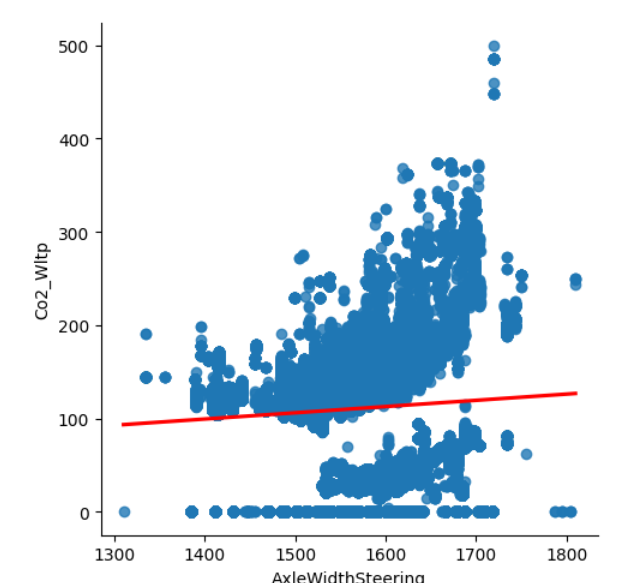

In [ ]:
### Correlation entre "AxleWidthSteering" et "Masse"
%%time

# On enleve temporairement les NaN pour faire le graphe
df1 = df.dropna(subset = ["AxleWidthSteering", 'MassRunningOrder'], how = 'any')
corr_matrix = df1[["AxleWidthSteering", "MassRunningOrder"]].corr()
print(corr_matrix, "\n")

pears = pearsonr(x = df1["AxleWidthSteering"], y = df1["MassRunningOrder"])
print("p-value: ", pears[1])
print("coefficient: ", pears[0])


                   AxleWidthSteering  MassRunningOrder
AxleWidthSteering           1.000000          0.807606
MassRunningOrder            0.807606          1.000000 

p-value:  0.0
coefficient:  0.8076062336071186
CPU times: user 1.28 s, sys: 973 ms, total: 2.25 s
Wall time: 2.25 s


## Conclusion 1 :   
  - Pourquoi p valeur petite (= corrélation ?)   
  - Variables BaseWheel	AxleWidthSteering	AxleWidthOther	"logiquement" sans rapport -> a supprimer  
  - AxleWidthSteering un peu corrélé car cela représente la "taile" de la voiture. Mais le poids sera surement plus corrélé.   
  - Garder "eventuellement" celle la. Etudier correl longueur/poids

# 5.7. Compréhesion des relations Qualitatives sur 'VFN','Tan','T','Va','Ve','Mk','Cn','m (kg)','Mt'

In [ ]:
# Garder 1 ligne par modele ou modalité
df01 = df0[df0.columns[[2,7,11,12,16,17,19,20,21,22,23,24,25,26, 27, 28,30,36,37]]]
df01.head()

# Bizarre/Erreur: panda de meme Tan, mais de poids différent + Pand(Erw + Fuel) en NaN
df02 = df01.drop_duplicates(subset=['Tan','Cn','m (kg)',])

# Bizarre/Erreur:Mazda 2 (et autres) de meme masses, mais de Tan différent
df02 = df01.drop_duplicates(subset=['Cn','m (kg)','Tan']).sort_values(by=['Cn','m (kg)','Tan'])

df03=df0.groupby(['VFN','Tan','T','Va','Ve','Mk','Cn','m (kg)','Mt'])['Tan'].count()

df03.head(20)
# df01.head()

In [ ]:
#### Table pivot pour analyser les regroupements possibles

# dups = df0.pivot_table(index = [ 'ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T','Va', 'Ve', 'Mk','Cn', 'Ct', 'Cr', 'r',\
#                                 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm', 'ec (cm3)',\
#                                 'ep (KW)', 'z (Wh/km)', 'IT','Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year',\
#                                 'Date of registration', 'Fuel consumption ', 'Electric range (km)'], aggfunc ='size')
pd.options.display.max_columns = None
pd.set_option('display.width',50)


df05= df0[df0['Ewltp (g/km)'] != 0]
df06= df05[df05['Mk'] == 'DACIA']
dups = df06.pivot_table(index = [ 'VFN', 'Mh', 'Tan','Va', 'Ve', 'Mk','Cn', 'Ct', 'm (kg)','Mt' , 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'ec (cm3)',  'ep (KW)', 'Fuel consumption '], aggfunc ='size')

# dups2=dups.sort_values((by=['Tan'])
dups.head(50)

## 5.8. Etude de 4 colonnes : 'InnovativeTechnology', 'InnovativeEmissionsReductionWltp', 'ElectricRange', 'ElectricConsumption'

**Conclusions** - Voir les cellules suivantes

- InnovativeTechnology: trop de codes différents et sans interet exploitable pour Co2
    donc on tague 0 si pas d'IT, 1 si présence d'IT  

- On supr 'InnovativeEmissionsReductionWltp' en première intention ?    
    - Ne concerne pas Elec, Hybride, bioethanol et Hydrogen   
    - Concerne 65% des autres (100% de celles qui ont une IT)   
    - Voir les correlation  

- On supr 'Electric Range' en première intention ?  
    - Correl de 0,7 pour les hybrides, 0% pour elec  
    - qui concerne 20 des Hybrides, Soit 20% de 11% du marché, soit 2% des voitures   
    - A faire en seconde intention uniquement  
    - Il y a une erreur d'un PETROL avec ER (à corriger)  

- On supr 'Electric Conso' en première intention ?  
    - Correl de 0,27 pour les hybrides, 0% pour elec  
    - qui concerne 20 des Hybrides, Soit 20% de 11% du marché, soit 2% des voitures    
    - A faire en seconde intention uniquement  


In [ ]:
# Inspection des NaN
print("[VALEURS ABSOLUES]")
display(df.isna().sum())

print()

print("[PROPORTIONS]")
display(df.isna().mean().sort_values(ascending=False))


In [ ]:
df.describe()

Resumé des Valeurs  
IT: 42% de NaN            (Code e333..etc)  
IER : 42 % de NaN         (de 0,5 /1,7/ 4,5)  
El Range: 85 % de NaN     (13/188/840)  
El Conso  75 % de NaN     (17/161/580)  

## 5.9. Etude de "'InnovativeTechnology' et "InnovativeEmissionsReductionWltp", qu'en faire ?

**Conclusions :**  
- Correspondance exacte entre 'InnovativeTechnology' et "InnovativeEmissionsReductionWltp", sauf pour 254 valeurs = 0,005 %  
-  On supprime 'InnovativeTechnology' car code sans interet pour Co2
- On supr 'InnovativeEmissionsReductionWltp' en première intention ?
- Ne concerne pas Elec, Hybride, bioethanol et Hydrogen  
- Concerne 65% des autres (100% de celles qui ont une IT)  

In [ ]:
### Relation entre IERW et IT (1)

pd.crosstab(df['InnovativeTechnology'].isna(), df['InnovativeEmissionsReductionWltp'].isna(), normalize = False)

In [ ]:
### Proportion d'IERW par type denergie

pd.crosstab(df.FuelType, df['InnovativeEmissionsReductionWltp'].isna(), normalize = 0 )

# Conclusion: Elec, Hybride, bioethanol et Hydrogen n'ont pas de 'InnovativeEmissionsReductionWltp' (que des NaN)
# Diesel: 25% de NaN
# E85: 18% de NaN
# LPG: 18%
# NG: 80% NaN
# Petrol: 80%

In [ ]:
### Controle: Les Vehicules hybrides ou electriques ont ils une "IERW"
# Caluler la proportion de NaN sur une sous-partie

dft = df[~df['FuelType'].isin(['DIESEL/ELECTRIC', 'NG-BIOMETHANE', 'HYDROGEN', 'PETROL/ELECTRIC', 'UNKNOWN'])]
pd.crosstab(1, dft['InnovativeEmissionsReductionWltp'].isna(), normalize = 0 )

In [ ]:
### Relation entre IERW et IT (2)

dft1 = df.value_counts(['InnovativeTechnology',"InnovativeEmissionsReductionWltp"]).sort_index()
display(dft1.head(10))

In [ ]:
### Proportion d'IERW par type denergie

pd.crosstab(df.FuelType, df['InnovativeEmissionsReductionWltp'].isna(), normalize = 0 )

# Conclusion: Elec, Hybride, bioethanol et Hydrogen n'ont pas de 'InnovativeEmissionsReductionWltp' (que des NaN)
# Diesel: 25% de NaN
# E85: 18% de NaN
# LPG: 18%
# NG: 80% NaN
# Petrol: 80%


In [ ]:
### Controle: Les Vehicules hybrides ou electriques ont ils une "IERW"
# Caluler la proportion de NaN sur une sous-partie

dft = df[~df['FuelType'].isin(['DIESEL/ELECTRIC', 'NG-BIOMETHANE', 'HYDROGEN', 'PETROL/ELECTRIC', 'UNKNOWN'])]
pd.crosstab(1, dft['InnovativeEmissionsReductionWltp'].isna(), normalize = 0 )

In [ ]:
# Conclusion'

# Pourles IT qui n'ont pas de IERW. Est-ce uniquement des e2 29
# -> 236 voitures IT sans IERW sont e2 29
# -> 254 voitures IT n'ont pas d'IERW
# -> 93% des IT sans IERW sont des e2 29

# Y a t'il assez de e2 29 avec IT et IERW par ailleurs. Oui, il y en a 218 000
# Donc on va supprimer les  IT qui n'ont pas de IERW

# pd.crosstab(1, df['InnovativeTechnology']=='e2 29', normalize = False)
# pd.crosstab(df.InnovativeEmissionsReductionWltp.isna(), df['InnovativeTechnology'].isna(), normalize = False)

InnovativeTechnology,False,True
row_0,,
1,8299900,217983


## 5.10 Etude:  'ElectricRange' - 'ElectricConsumption' , qu'en faire ?

***Conclusions:***

si EC alors ER  
88% des ER ont un EC  

Seuls les elec et hybrides ont la colonne ElectricConsumption ou ElectricRange   
Hybrid + Electric ont presque tous (99%) un EC   
50% des ELEC ont un ER   
20% des Hybrides ont un ER   

Pas de corrélation entre elles.(ni avec EReduc_WLPT)  

Pour les voitures hybride, cor avec Co2 de  
- 0,7 pourles Electric Range      
- 0,27 pour Electric Conso  
Pour les voitures elec, aucune correl avec Co2 (=0)  

--> On peut eventuellement garder Electric Range  
        - Correl de 0,7 pour les hybrides, 0% pour elec  
        - qui concerne 20 des Hybrides, Soit 20% de 11% du marché, soit 2% des voitures    
        - A faire en seconde intention uniquement  
        - Il y a une erreur d'un PETROL avec ER (à corriger)  
        
--> On peut eventuellement garder Electric Conso  
        - Correl de 0,27 pour les hybrides, 0% pour elec  
        - qui concerne 20 des Hybrides, Soit 20% de 11% du marché, soit 2% des voitures    
        - A faire en seconde intention uniquement

In [ ]:
El Range: 85 % de NaN     (13/188/840)
El Conso  75 % de NaN     (17/161/580)

In [ ]:
# Lien entre EC et ER
pd.crosstab(df.ElectricConsumption.isna(), df['ElectricRange'].isna(), normalize = 1)

# Conclusions:

# 99.9% des "EC ont un ER
# 39% des non EC ont un ER

# 88% des ER ont un EC
# 0.6 % des non ER ont un EC

# Bilan si EC alors ER

In [ ]:
# Proportion d'ElectricConsumption par type de carburant

pd.crosstab(df.FuelType, df['ElectricConsumption'].isna(), normalize = 0 )

# Conclusion: Seuls les elec et hybrides ont la colonne ElectricConsumption (donc pas de IR (ni IT))

In [ ]:
# Proportion d''ElectricRange' par type de carburant

pd.crosstab(df.FuelType, df['ElectricRange'].isna(), normalize = 0 )

# Conclusion:
# Seuls les elec et hybrides ont la colonne ElectricRange (donc pas de IR (ni IT - a vérifier)
# Il y a une erreur d'un PETROL avec ER (à corriger)

In [ ]:
### Etude des corrélations'ElectricConsumption', 'ElectricRange', 'InnovativeEmissionsReductionWltp'

df[['ElectricConsumption', 'ElectricRange', 'InnovativeEmissionsReductionWltp']].corr()

# Bilan:
# Pas de corrélation

# Remarque:
# Si InovReduc, pas de ER ni EC . Car ER et EC ne concerne que les non electriques ?

# Donc pas de corrélation, ni entre elles, ni avec Co2 (a étudier en se limitant aux elec)

In [ ]:
df=df.drop('InnovativeTechnology', axis=1)

In [ ]:
### Etude des corrélations 'ElectricConsumption', 'ElectricRange', 'InnovativeEmissionsReductionWltp'
### en se limitant aux electriques/hybrides

dft = df[df['FuelType'].isin(['DIESEL/ELECTRIC', 'PETROL/ELECTRIC', 'ELECTRIC'])]

dft[['ElectricConsumption', 'ElectricRange', 'InnovativeEmissionsReductionWltp']].corr()

In [ ]:
### Relation entre 'FuelType' et EC ou ER

pd.crosstab(df.FuelType, df['ElectricConsumption'].isna(), normalize = 0 )
pd.crosstab(df.FuelType, df['ElectricRange'].isna(), normalize = 0 )

# Conclusion: Seuls les elec et hybrides ont ces colonnes EC ou ER

In [ ]:
#### Conclusions:

# ElecRange et ElecCons ne concernent que les Hybrid + Electric
# Hybrid + Electric ont presque tous (99%) un EC
# 50% des ELEC ont un ER
# 20% des Hybrides ont un ER


In [ ]:
#### Corrélations 'ElectricRange', 'ElectricConsumption', 'Co2EmissionsWltp' pour les voitures qui ont EC ou ER

# df des voitures avec une de ces 2 colonne remplie
dft2 = df.dropna(subset = ['ElectricRange',  'ElectricConsumption'], how = 'all')
dft2.head()

# corrélation matrix
cm = dft2[['ElectricRange', 'ElectricConsumption', 'Co2EmissionsWltp']].corr(method='pearson')
display(cm)


"""
Conclusion. Pour les voitures elec ou hybride, cor de
- 0,67 entre Co2 et Electric Range
- 0,16 entre Co2 et Electric Conso
""";


In [ ]:
### Graphe de corrélation ER et EC vis a vis de CO2

# Supprimer les lignes contenant des zéros
dft2_cleaned_rows = dft2.replace(0, pd.NA).dropna()

# Graphiques

fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.scatter(x = 'ElectricRange', y = 'Co2EmissionsWltp', alpha = 0.05, data = dft2_cleaned_rows)

ax2 = fig.add_subplot(122)
ax2.scatter(x = 'ElectricConsumption', y = 'Co2EmissionsWltp', alpha = 0.05, data = dft2_cleaned_rows)

plt.show()

# Conclusion: je suppose que la correlation est valable pour les hybrides.(à tester)
# Il faudrait voir ce que sont les valeurs avec un Co2 élevé dans le graph1
# On peut garder "electric range" en deuxième intention


In [ ]:
### Graphe de corrélation ER et EC vis a vis de CO2 en se limitant aux voitures Hybrides (1)

# df des voitures = Hybrides avec une de ces 2 colonne remplie
dft = df[df['FuelType'].isin(['DIESEL/ELECTRIC', 'PETROL/ELECTRIC'])]

# Supprimer les lignes contenant des zéros
dft1 = dft.replace(0, pd.NA).dropna()

# Graphiques
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.scatter(x = 'ElectricRange', y = 'Co2EmissionsWltp', alpha = 0.05, data = dft)

ax2 = fig.add_subplot(122)
ax2.scatter(x = 'ElectricConsumption', y = 'Co2EmissionsWltp', alpha = 0.05, data = dft)

plt.show()

**Conclusions**

> Corrélation pour les 2 variables ave Co2, mais attention à la valeur extreme  
> Cela ne concerne que 20% des hybrides pour ER, et 100% pour EC   
> Soit 20% de 11% du marché, soit 2% des voitures pour ER. A voir en seconde intention uniquement ?  
> Soit 11% du marché, soit 11% des voitures pour EC. A voir en seconde intention uniquement ?  

In [ ]:
# Répartition des voitures par energie
df.FuelType.value_counts(normalize = 1)*100

In [ ]:
### Corrélation ER et EC vis a vis de CO2 en se limitant aux voitures Electriques (1)

# Inutile, car les voitures elctriques n'emettent pas de CO2

## 5.11. Bilan dataset actuel

#### Bilan correlation variables quantitatives

In [ ]:
# Heatmap

# On enleve temporairement les var categorielles
dfg = df.drop(['Pool', 'CategoryOf', 'FuelType', 'InnovativeTechnology'], axis=1)

plt.figure(figsize = (7,7))
sns.heatmap(dfg.corr(), annot = True, cmap='RdBu_r')
plt.show()

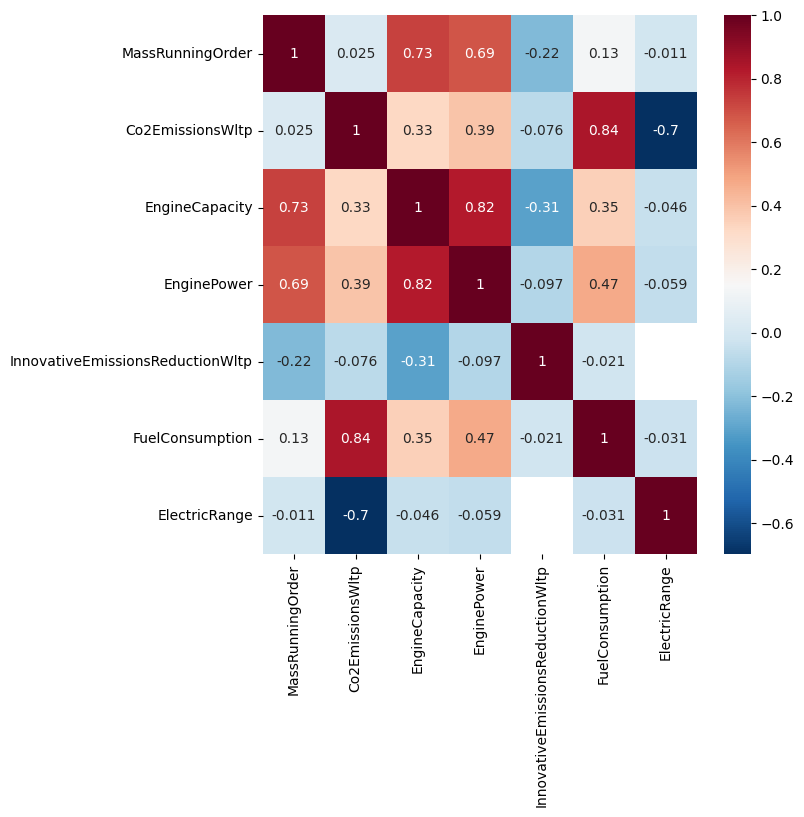

In [ ]:
## Heatmap

# On enleve temporairement les var categorielles
dfg = df.drop(['Pool', 'CategoryOf', 'FuelType'], axis=1)
dfg = df.drop(['Pool', 'CategoryOf', 'FuelType', 'InnovativeTechnology' ], axis=1)


plt.figure(figsize = (7,7))
sns.heatmap(dfg.corr(), annot = True, cmap='RdBu_r')
plt.show()

In [ ]:
df.head()

,CategoryOf,MassRunningOrder,Co2EmissionsWltp,EngineCapacity,EnginePower,InnovativeTechnology,InnovativeEmissionsReductionWltp,FuelConsumption,ElectricRange,Pool_BMW,Pool_FORD,Pool_HYUNDAI,Pool_HYUNDAI MOTOR EUROPE,Pool_KIA,Pool_MAZDA-SUBARU-SUZUKI-TOYOTA,Pool_MERCEDES-BENZ,Pool_RENAULT-NISSAN-MITSUBISHI,Pool_STELLANTIS,Pool_TESLA,Pool_TESLA-HONDA-JLR,Pool_VOLKSWAGEN,Pool_VW-SAIC,Fuel_DIESEL,Fuel_DIESEL/ELECTRIC,Fuel_ETHANOL,Fuel_LPG,Fuel_NATURALGAS,Fuel_NG,Fuel_PETROL,Fuel_PETROL/ELECTRIC
195,M1,1245.0,129.0,1199.0,74.0,1,1.3,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
196,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
197,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
200,M1,1245.0,129.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
201,M1,1245.0,128.0,1199.0,74.0,1,1.3,5.7,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
